# Nearest Neighbor para reconhecimento de dígitos escritos á mão.

Neste notebook, vamos construir um classificador que data uma imagem de um dígito manuscrito, atribuirá um label $ l \in \{0,1,2,3,4,5,6,7,8,9\}$. Veremos uma estratégia particularmente simples para esse problema, conhecida como o classificador de vizinho mais próximo

requirements:
* `numpy`
* `matplotlib`
* `sklearn` ( Apenas para demosntração)

## 1. O dataset MNIST 

`MNIST` é um conjunto de dados clássico em aprendizado de máquina, que se trata de imagens 28x28 pixels em escala de cinza que representam dígitos. O conjunto de treinamento original contém 60.000 exemplos e o conjunto de teste contém 10.000 exemplos. Neste notebook, trabalharemos com um subconjunto desses dados: um conjunto de treinamento de 7.500 exemplos e um conjunto de teste de 1.000 exemplos

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import time

## carregando os dados de treino
train_data = np.load('MNIST/train_data.npy') 
train_labels = np.load('MNIST/train_labels.npy')

## carregando os dados de teste
test_data = np.load('MNIST/test_data.npy')
test_labels = np.load('MNIST/test_labels.npy')

In [2]:
import pandas as pd

### wtf is .npy?

<a href="https://fileinfo.com/extension/npy"> Clique aqui e descubra ;)</a>



In [3]:
#np.savetxt('train_data.txt',train_data)

In [4]:
## Printando na tela as dimensões dos dados
print("Dimensão dos dados de treino: ", np.shape(train_data))
print("Número de labels do treino: ", len(train_labels))
print("Dimensão dos dados de teste: ", np.shape(test_data))
print("Número de labels do teste: ", len(test_labels))

Dimensão dos dados de treino:  (7500, 784)
Número de labels do treino:  7500
Dimensão dos dados de teste:  (1000, 784)
Número de labels do teste:  1000


In [5]:
## Calculando o número de exemplos de cada dígito
train_digits, train_counts = np.unique(train_labels, return_counts=True)
print("Distribuição dos dados de Treino:")
print(dict(zip(train_digits, train_counts)))

test_digits, test_counts = np.unique(test_labels, return_counts=True)
print("Distribuição dos dados de teste:")
print(dict(zip(test_digits, test_counts)))

Distribuição dos dados de Treino:
{0: 750, 1: 750, 2: 750, 3: 750, 4: 750, 5: 750, 6: 750, 7: 750, 8: 750, 9: 750}
Distribuição dos dados de teste:
{0: 100, 1: 100, 2: 100, 3: 100, 4: 100, 5: 100, 6: 100, 7: 100, 8: 100, 9: 100}


## 2. Visualizando os dados
Cada ponto de dados é armazenado como vetor 784-dimensional. Para visualizar um ponto de dados, primeiro modificamos a imagem para 28x28.

In [6]:
def show_digit(x):
    """função que exibe um dígito dada sua representação vetorial"""
    plt.axis('off')
    plt.imshow(x.reshape((28,28)), cmap=plt.cm.gray)
    plt.show()
   # return

def vis_image(index, dataset="train"):
    """Função que dado um indice e um dataset, mostra a imagem armazenada naquela posição"""
    if(dataset=="train"): 
        show_digit(train_data[index,])
        label = train_labels[index]
    else:
        show_digit(test_data[index,])
        label = test_labels[index]
    print("Label " + str(label))
    return

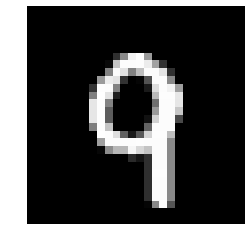

Label 9


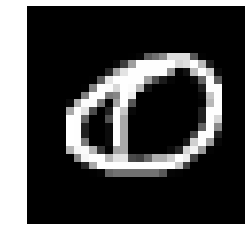

Label 0


In [7]:
## olhando para o primeiro ponto do data set de treino
vis_image(0, "train")

## Olhando para o primeiro ponto do dataset de teste
vis_image(0, "test")

## 3. Distância Euclidiana

Para calcular os vizinhos mais próximos em nosso conjunto de dados, precisamos primeiro calcular as distâncias entre os pontos de dados. Uma função de distância natural é a distância euclidiana: para dois vetores $x, y \in \mathbb{R}^d$, a distância euclidiana entre eles é definida como
$$\|x - y\| = \sqrt{\sum_{i=1}^d (x_i - y_i)^2}.$$
Muitas vezes omitimos a raiz quadrada e simplesmente calculamos a distância euclidiana _quadrada_:
$$\|x - y\|^2 = \sum_{i=1}^d (x_i - y_i)^2.$$
Para os cálculos dos vizinhos mais próximos, os dois são equivalentes: para três vetores $x, y, z \in \mathbb{R}^d$, nós temos $\|x - y\| \leq \|x - z\|$ se e somente se $\|x - y\|^2 \leq \|x - z\|^2$.

Agora só precisamos ser capazes de calcular a distância euclidiana ao quadrado. A função a seguir faz isso.

In [8]:
## Computes squared Euclidean distance between two vectors.
def squared_dist(x,y):
    return np.sum(np.square(x-y))

In [9]:
## calcular a distância entre os vetores ( l2)
#print("Distancia do 1 pro 2: ", squared_dist(train_data[1,],train_data[2,]))
#print("Distancia do 1 pro 3: ", squared_dist(train_data[1,],train_data[3,]))
#print("Distancia do 1 pro 1: ", squared_dist(train_data[1,],train_data[1,]))

## 4. Calculando os vizinhos mais próximos:

Agora que temos uma função de distância definida, podemos agora passar para a classificação de vizinho mais próximo.

In [10]:
def find_NN(x):
    '''Função recebe um vetor x e retorn o indice do seu vizinho mais próximo, presente no dataset'''
    
    # calcula a distancia de x para cada linha (vetor) do dataset
    distances = [squared_dist(x,train_data[i,]) for i in range(len(train_labels))]
    
    # retorna o indice da menor distância
    return np.argmin(distances)

def NN_classifier(x):
    """Pega um vetor x e retorna o label do seu vizinho mais próximo no dataset"""
    # Recebe o index do vizinho mais proximo
    index = find_NN(x)
    # Retorna a classe dele
    return train_labels[index]

Um caso de sucesso:
Classificação do 1-NN:  0
Label verddeiro:  0
A imagem de teste:


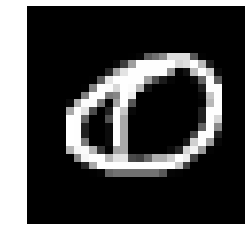

Label 0
A imagem do vizinho mais próximo:


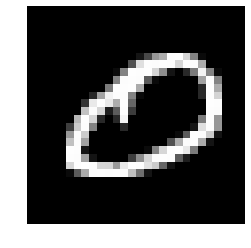

Label 0


In [11]:
## casos de sucesso:
print("Um caso de sucesso:")
print("Classificação do 1-NN: ", NN_classifier(test_data[0,]))
print("Label verddeiro: ", test_labels[0])
print("A imagem de teste:")
vis_image(0, "test")
print("A imagem do vizinho mais próximo:")
vis_image(find_NN(test_data[0,]), "train")

Um 'deu ruim' :
Classificação do 1-NN:  2
O label verdadeiro:  3
A imagem de teste:


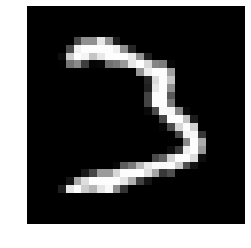

Label 3
A imagem do vizinho mais próximo:


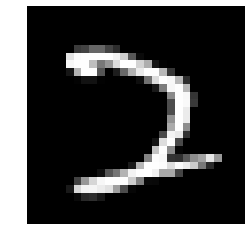

Label 2


In [12]:
## deu ruim:
print("Um 'deu ruim' :")
print("Classificação do 1-NN: ", NN_classifier(test_data[39,]))
print("O label verdadeiro: ", test_labels[39])
print("A imagem de teste:")
vis_image(39, "test")
print("A imagem do vizinho mais próximo:")
vis_image(find_NN(test_data[39,]), "train")

## 6. Processando o conjunto completo de testes

Agora, vamos aplicar nosso classificador de vizinho mais próximo ao conjunto de dados completo.

Observe que, para classificar cada ponto de teste, nosso código passa completamente sobre cada um dos 7500 exemplos de treinamento. Portanto, não devemos esperar que o teste seja muito rápido. O código a seguir leva cerca de 55 segundos no Intel Core i5 7ªGeração de 2,5 GHz.

In [13]:
## classificando cada ponto e cronometrando!
t_before = time.time()
test_predictions = [NN_classifier(test_data[i,]) for i in range(len(test_labels))]
t_after = time.time()

## Computando o erro
err_positions = np.not_equal(test_predictions, test_labels)
error = float(np.sum(err_positions))/len(test_labels)

print("Erro do nosso classificado: ", error)
print("Tempo para a classificação (segundos): ", t_after - t_before)

Erro do nosso classificado:  0.046
Tempo para a classificação (segundos):  62.29792642593384


In [14]:
# confusion matrix

from sklearn.metrics import confusion_matrix

In [15]:
confusion_matrix(y_pred=test_predictions,y_true=test_labels)

array([[ 99,   0,   0,   0,   0,   1,   0,   0,   0,   0],
       [  0, 100,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,  94,   1,   0,   0,   0,   3,   1,   0],
       [  0,   0,   2,  91,   2,   4,   0,   0,   1,   0],
       [  0,   0,   0,   0,  97,   0,   0,   0,   0,   3],
       [  1,   0,   0,   0,   0,  98,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   1,  99,   0,   0,   0],
       [  0,   4,   0,   0,   1,   0,   0,  94,   0,   1],
       [  2,   0,   1,   1,   1,   0,   1,   1,  92,   1],
       [  1,   1,   1,   1,   2,   1,   0,   3,   0,  90]], dtype=int64)

In [16]:
import seaborn as sns
import pandas as pd

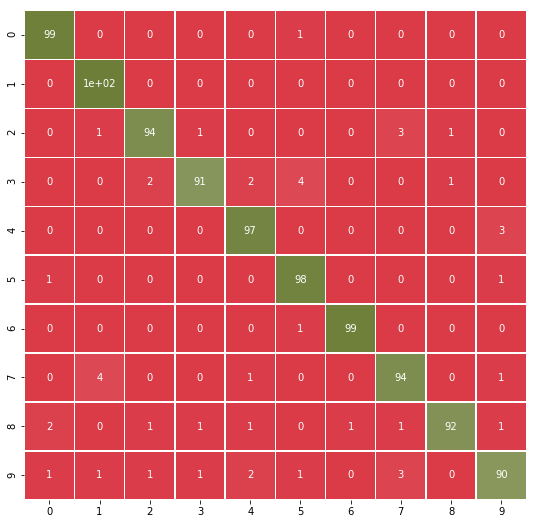

In [17]:
cmap = sns.diverging_palette(10, 100, as_cmap=True)
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_pred=test_predictions,y_true=test_labels),
           vmax=100, annot = True,cbar = False,linewidths=.5, cmap = cmap)
plt.show()

## Como melhorar a performance e diminuir ainda mais o erro?

#### Diminuindo o erro...
<ol>
    <li>Alterar o número de vizinhos, ou seja k > 2</li>
    <li>Alterar a função de distância</li>
</ol>

In [18]:
# Mexendo no número de vizinhos

# Crie uma função que classifique um dado vetor x, de acordo com  o label mais recorrente de k vizinhos mais pr´ximos 

def find_k_NN(x,k):
    """Função recebe um vetor x e um escalar k, e retorna o indice dos k vetores mais próximos no dataset"""
    # dica, use o método argsort do numpy
    
    ### escreva aqui
    
def k_NN_classifier(x,k):
    """Função recebe um vetor x e um escalar k e retorna uma predição para o label de x"""
    
    ### escreva aqui

1 - Qual o número ótimo de vizinhos?

In [19]:
# vizualize os resultados...

In [20]:
# uma nova noção de simmilaridade...



# Performance... 

## parta pra ignorancia

## 7. Faster nearest neighbor methods

A realização da classificação de vizinho mais próximo na forma como apresentamos exige uma passagem completa pelo conjunto de treinamento para classificar um único ponto. Se houver pontos de treinamento de $ N $ em $ \mathbb {R} ^ d $, isso levará $ O (N d) $ tempo.

Felizmente, existem métodos mais rápidos de executar o vizinho mais próximo se estivermos dispostos a gastar algum tempo pré-processando o conjunto de treinamento. `scikit-learn` possui implementações rápidas de duas estruturas úteis de dados de vizinhos mais próximos: a ballTree_ e a tree _k-d_.

In [21]:
from sklearn.neighbors import BallTree

## Pré-processamento
t_before = time.time()
ball_tree = BallTree(train_data)
t_after = time.time()

## Computar o tempo de pre-processamento
t_training = t_after - t_before
print("Tmpo para construir a nova estrutura de dados(segundos): ", t_training)

## classificando todo o conjunto de teste
t_before = time.time()
test_neighbors = np.squeeze(ball_tree.query(test_data, k=1, return_distance=False))
ball_tree_predictions = train_labels[test_neighbors]
t_after = time.time()

## Computando o tempo das predições
t_testing = t_after - t_before
print("Tempo para classificar todo o dataset: ", t_testing)

## Verificar se as predições são as mesmas
print("Ball tree produziu o mesmo resultado que demoramos séculos para obter? ", np.array_equal(test_predictions, ball_tree_predictions))

Tmpo para construir a nova estrutura de dados(segundos):  0.5154218673706055
Tempo para classificar todo o dataset:  8.341763973236084
Ball tree produziu o mesmo resultado que demoramos séculos para obter?  True


In [22]:
from sklearn.neighbors import KDTree

## Pré-processamento
t_before = time.time()
kd_tree = KDTree(train_data)
t_after = time.time()

## Computar o tempo de pre-processamento
t_training = t_after - t_before
print("Time to build data structure (seconds): ", t_training)

## classificando todo o conjunto de teste
t_before = time.time()
test_neighbors = np.squeeze(kd_tree.query(test_data, k=1, return_distance=False))
kd_tree_predictions = train_labels[test_neighbors]
t_after = time.time()

## Computando o tempo das predições
t_testing = t_after - t_before
print("Time to classify test set (seconds): ", t_testing)

## Verificar se as predições são as mesmas
print("KD tree produziu o mesmo resultado que demoramos séculos para obter?", np.array_equal(test_predictions, kd_tree_predictions))

Time to build data structure (seconds):  0.49991631507873535
Time to classify test set (seconds):  10.13824200630188
KD tree produziu o mesmo resultado que demoramos séculos para obter? True
